<a href="https://colab.research.google.com/github/hseyeon1006/ESAA_OB/blob/%ED%95%84%EC%82%AC/CH4_1~3_HW1127.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CHAPTER04. 합성곱 신경망(CNN)

##01. 합성곱 신경망

###1. 이미지 표현

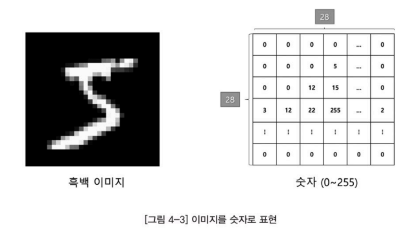

숫자 0은 검은색, 255는 흰색을 나타냄

###2. 합성곱 (Convolution)

* 합성곱 연산 : 입력 이미지에 대해 일반적으로 정방형 크기를 가지는 커널을 사용하여 입력 이미지에 대한 특성을 추출하는 방법
* 특성맵 : 합성곱 연산을 통해 추출된 이미지

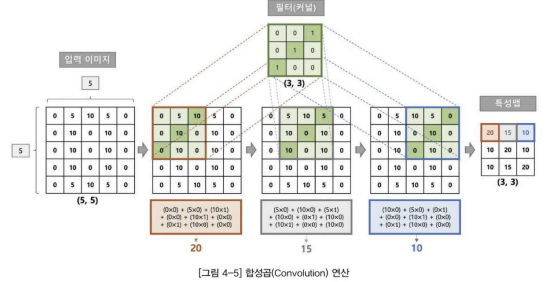

###3. 채널(Channel)

* 채널 : 입력 이미지를 구성하는 2차원 배열의 개수

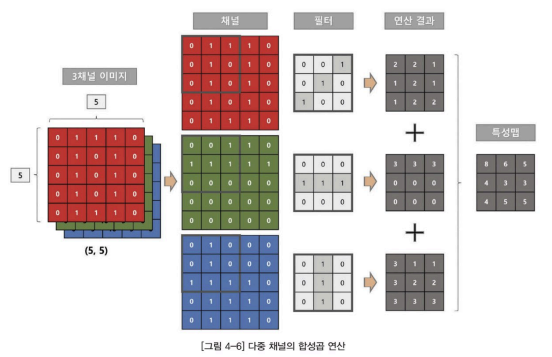

###4. 스트라이드 (stride)

* 스트라이드 : 커널은 좌측 상단으로부터 입력 이미지를 기준으로 우측으로 이동하면서 합성곱 연산을 계속 수행하고 특성맵에 결과를 채워나가는데, 이때 이동하는 간격. 주로 1 또는 2로 설정

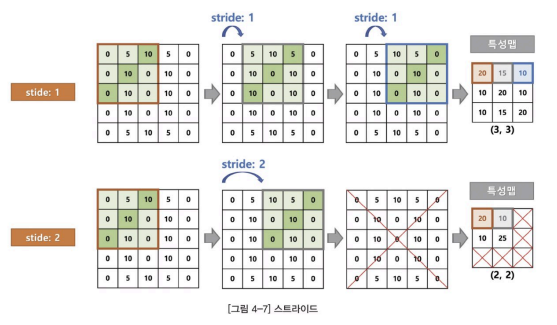

###5. 패딩 (Padding)

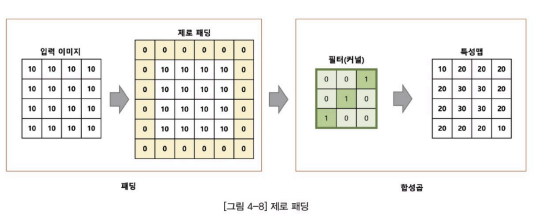

###6. 특성맵 사이즈

입력 데이터와 필터의 크기가 주어졌을 때 출력 데이터의 크기를 구하는 식

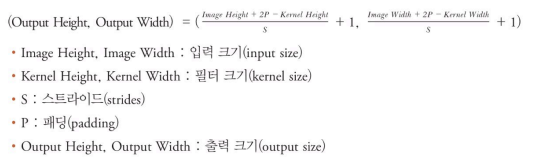

###7. 풀링

* 풀링 레이어 : 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어
* 장점 : 이미지 축소를 통해 연산량을 감소함. 과대적합을 방지함
* 종류 : 최대 풀링, 평균 풀링

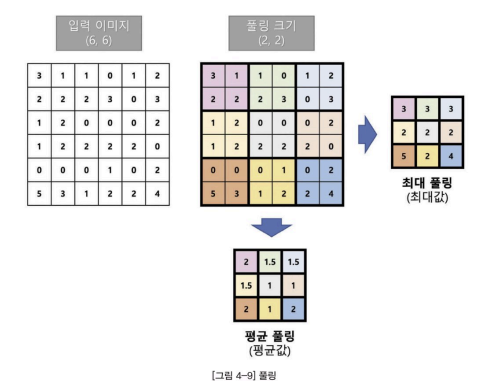

##02. 간단한 모델 생성

###1. 데이터 로드 및 전처리

In [1]:
# tensorflow 모듈 import
import tensorflow as tf

In [2]:
# mnist 손글씨 이미지 데이터 로드
mnist=tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid)=mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


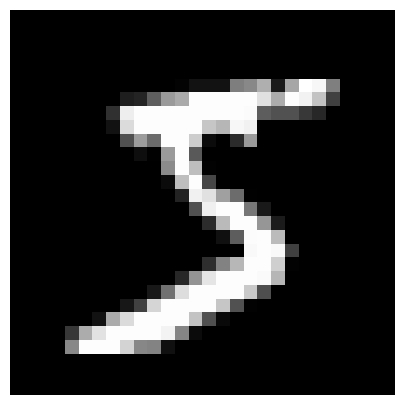

In [3]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx], cmap='gray')
  plt.axis('off')
  plt.show()

plot_image(x_train, 0)

In [4]:
#최소값, 최대값 출력
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


-> 이미지 픽셀이 0~255 범위의 숫자로 구성됨

In [5]:
# 정규화(Normalization)
x_train=x_train/255.0
x_valid=x_valid/255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [8]:
# 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in=x_train[..., tf.newaxis]
x_valid_in=x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


###2. Sequential API로 모델 생성 및 학습

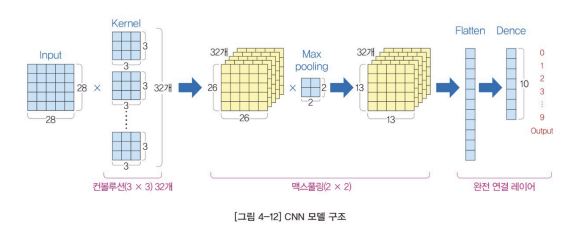

In [6]:
# Sequential API를 사용해 샘플 모델 생성
model=tf.keras.Sequential([
    #Convolution 적용 (32 filters)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='conv'),
    #max pooling 적용
    tf.keras.layers.MaxPooling2D((2,2), name='pool'),
    #classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [9]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 45s 23ms/step - loss: 0.2061 - accuracy: 0.9413 - val_loss: 0.0889 - val_accuracy: 0.9742
Epoch 2/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0795 - accuracy: 0.9769 - val_loss: 0.0671 - val_accuracy: 0.9783
Epoch 3/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0609 - accuracy: 0.9816 - val_loss: 0.0578 - val_accuracy: 0.9808
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0502 - accuracy: 0.9848 - val_loss: 0.0600 - val_accuracy: 0.9805
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0431 - accuracy: 0.9867 - val_loss: 0.0525 - val_accuracy: 0.9831
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0367 - accuracy: 0.9887 - val_loss: 0.0531 - val_accuracy: 0.9822
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0311 - accuracy: 0.9904 - val_loss: 0.0558 -

-> 두 번째 에포크를 마친 상태에서도 훈련 셋과 검증 셋 모두 97%에 가까운 정확도를 보임

In [10]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 1s 5ms/step - loss: 0.0552 - accuracy: 0.9844


[0.05516364797949791, 0.9843999743461609]

-> 검증 셋에 대해서 약 98%의 정확도를 나타냄

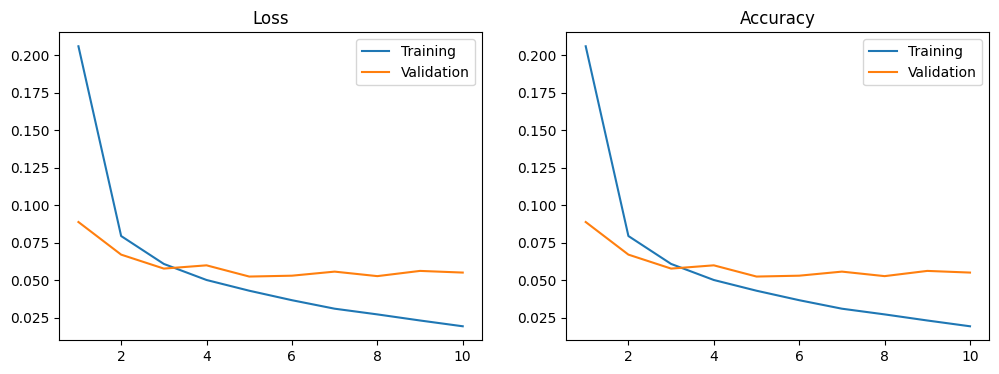

In [11]:
def plot_loss_acc(history, epoch):
  loss, val_loss=history.history['loss'], history.history['val_loss']
  acc, val_acc=history.history['accuracy'], history.history['val_accuracy']

  fig, axes=plt.subplots(1, 2, figsize=(12, 4))

  axes[0].plot(range(1, epoch+1), loss, label='Training')
  axes[0].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[0].legend(loc='best')
  axes[0].set_title('Loss')

  axes[1].plot(range(1, epoch+1), loss, label='Training')
  axes[1].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[1].legend(loc='best')
  axes[1].set_title('Accuracy')

  plt.show()

plot_loss_acc(history, 10)

-> 4 에포크 이후부터는 모델이 과대적합으로 진행되었음을 파악 가능함

###3. 모델 구조 파악

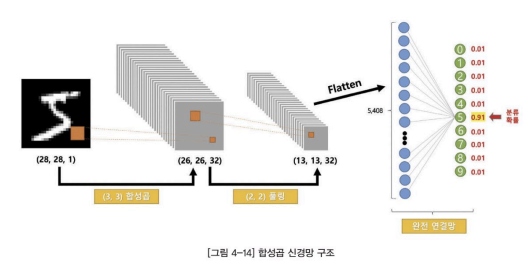

In [12]:
# 모델 구조
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# 입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [14]:
# 출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

-> 10개의 노드를 갖는 1차원 벡터 형태

In [15]:
# 레이어
model.layers

-> 4개의 레이어로 구성됨

In [16]:
# 첫 번째 레이어 선택
model.layers[0]

In [17]:
# 첫 번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [18]:
# 첫 번재 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [19]:
# 첫 번재 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 4.47280645e-01, -7.11428225e-02, -6.81838393e-01,
            2.22371385e-01,  3.08368683e-01,  3.15184951e-01,
           -2.01355696e-01,  7.90209451e-05, -4.00304228e-01,
           -1.18747674e-01, -1.24333370e+00, -1.86112523e-01,
            3.20008546e-01,  2.46952727e-01, -3.06195736e-01,
            2.59735465e-01, -3.64887983e-01,  1.93878889e-01,
           -4.81167585e-01, -1.48106162e-02, -4.49368268e-01,
           -1.06710660e+00, -1.41802415e-01,  3.48344713e-01,
            1.56873018e-01, -3.07315379e-01,  3.54946017e-01,
            3.34201902e-01, -1.65232345e-02,  5.74177444e-01,
           -6.36294067e-01,  2.08065197e-01]],
 
         [[ 2.35606246e-02,  4.64538544e-01,  1.23846613e-01,
           -3.56075317e-01,  1.07046671e-01,  2.80079752e-01,
           -3.79789948e-01,  3.76176178e-01, -7.89205313e-01,
           -1.48913562e-01, -6.96938515e-01, -1.01721659e-01,
           

In [20]:
# 첫 번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 4.47280645e-01, -7.11428225e-02, -6.81838393e-01,
           2.22371385e-01,  3.08368683e-01,  3.15184951e-01,
          -2.01355696e-01,  7.90209451e-05, -4.00304228e-01,
          -1.18747674e-01, -1.24333370e+00, -1.86112523e-01,
           3.20008546e-01,  2.46952727e-01, -3.06195736e-01,
           2.59735465e-01, -3.64887983e-01,  1.93878889e-01,
          -4.81167585e-01, -1.48106162e-02, -4.49368268e-01,
          -1.06710660e+00, -1.41802415e-01,  3.48344713e-01,
           1.56873018e-01, -3.07315379e-01,  3.54946017e-01,
           3.34201902e-01, -1.65232345e-02,  5.74177444e-01,
          -6.36294067e-01,  2.08065197e-01]],

        [[ 2.35606246e-02,  4.64538544e-01,  1.23846613e-01,
          -3.56075317e-01,  1.07046671e-01,  2.80079752e-01,
          -3.79789948e-01,  3.76176178e-01, -7.89205313e-01,
          -1.48913562e-01, -6.96938515e-01, -1.01721659e-01,
           6.62672669e-02,  

In [21]:
# 첫 번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.4874368 , -0.00340542, -0.13810444, -0.2317899 , -0.35199213,
       -0.27511927, -0.19986406, -0.01052724, -0.02244902, -0.02647284,
       -0.03531225, -0.00051319, -0.4027145 ,  0.13357957, -0.24892822,
       -0.23469865, -0.20862468, -0.04619282, -0.12289491, -0.00641587,
       -0.0758154 , -0.0650007 , -0.02704623, -0.1502032 ,  0.0705322 ,
       -0.26979193, -0.32739624, -0.31128818,  0.00266095,  0.05473283,
       -0.19266044, -0.22954515], dtype=float32)>

In [22]:
# 레이어 이름 사용해 레이어 선택
model.get_layer('conv')

In [23]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가 (첫 번째, 두 번째 레이어)
activator=tf.keras.Model(inputs=model.input, outputs=[layer.output for layer in model.layers[:2]])
activations=activator.predict(x_train_in[0][tf.newaxis, ...])

len(activations)

1/1 [==============================] - 0s 77ms/step


2

In [24]:
# 첫 번재 레이어 conv의 출력층
conv_activation=activations[0]
conv_activation.shape

(1, 26, 26, 32)

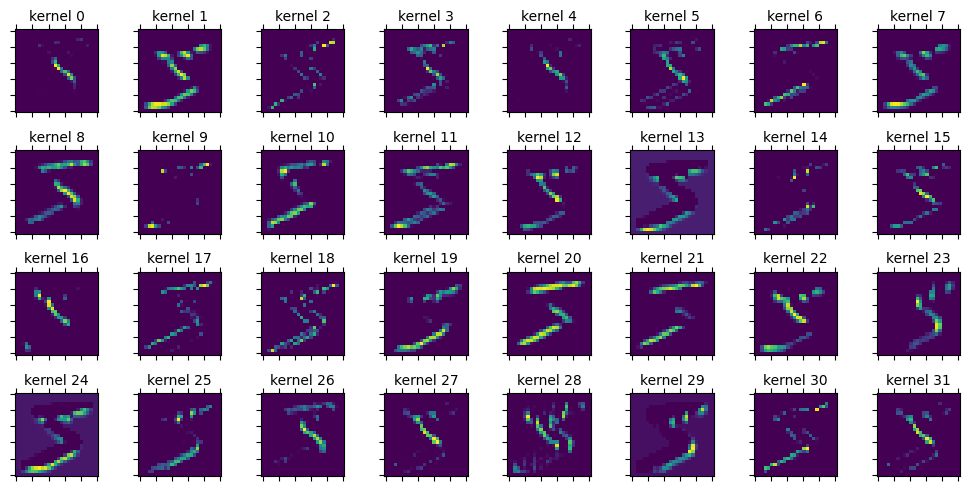

In [25]:
# Convolution 시각화
fig, axes=plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [26]:
# 두번째 레이어 pool 출력층
pooling_activation=activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


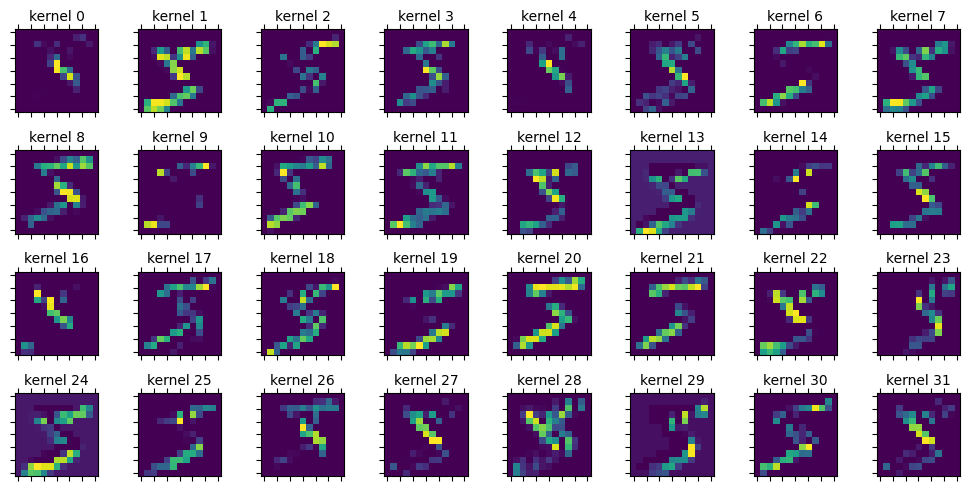

In [27]:
# 시각화
fig, axes=plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

##03. 복잡한 모델 생성

###1. 데이터셋 준비

In [28]:
import tensorflow as tf
import numpy as np

#mnist 손글씨 이미지 데이터 로드
mnist=tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid)=mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


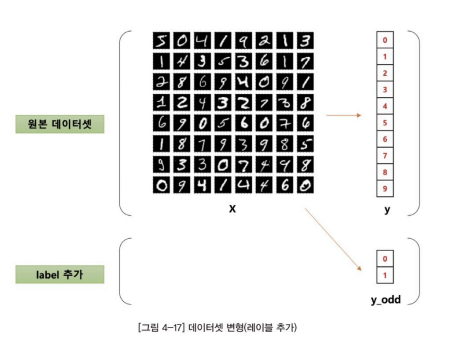

In [29]:
# 새로운 출력 값 배열 생성 (홀수 : 1, 짝수 : 0)
y_train_odd=[]
for y in y_train:
  if y%2==0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)

y_train_odd=np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [30]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


-> 홀수 짝수 여부가 잘 정리됨

In [31]:
# Validation 데이터셋 처리
y_valid_odd=[]
for y in y_valid:
  if y%2==0:
    y_valid_odd.append(0)
  else:
    y_valid_odd.append(1)

y_valid_odd=np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [32]:
# 정규화
x_train=x_train/255.0
x_valid=x_valid/255.0

# 채널 추가
x_train_in=tf.expand_dims(x_train, -1)
x_valid_in=tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


###2. Functional API로 다중 입력, 다중 출력 레이어 생성

장점 : 함수의 입력과 출력으로 표현할 수 있어서 자유롭게 모델 구조를 정의할 수 있음

In [33]:
# Functional API 를 사용하여 모델 생성

inputs=tf.keras.layers.Input(shape=(28, 28, 1))

conv=tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool=tf.keras.layers.MaxPooling2D((2,2))(conv)
flat=tf.keras.layers.Flatten()(pool)

flat_inputs=tf.keras.layers.Flatten()(inputs)
concat=tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs=tf.keras.layers.Dense(10, activation='softmax')(concat)

model=tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 26, 26, 32)           320       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 flatten_1 (Flatten)         (None, 5408)                 0         ['max_pooling2d[0][0]'] 

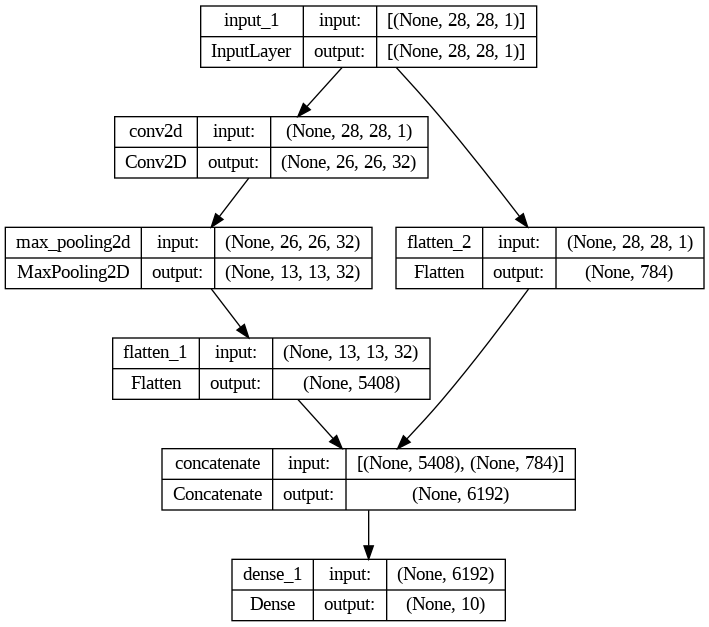

In [34]:
# 모델 구조 출력 및 이미지 파일로 저장
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

In [35]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=model.fit(x_train_in, y_train, validation_data=(x_valid, y_valid), epochs=10)

# 모델 성능
val_loss, val_acc=model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2015 - accuracy: 0.9423 - val_loss: 0.0972 - val_accuracy: 0.9696
Epoch 2/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0785 - accuracy: 0.9767 - val_loss: 0.0684 - val_accuracy: 0.9784
Epoch 3/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0601 - accuracy: 0.9821 - val_loss: 0.0607 - val_accuracy: 0.9798
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0497 - accuracy: 0.9850 - val_loss: 0.0667 - val_accuracy: 0.9785
Epoch 5/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0411 - accuracy: 0.9873 - val_loss: 0.0556 - val_accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0347 - accuracy: 0.9892 - val_loss: 0.0536 - val_accuracy: 0.9830
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0292 - accuracy: 0.9907 - val_loss: 0.0548 -

-> 10개의 숫자 레이블을 맞추는 모델의 정확도는 약 98%로 앞서 학습한 모델과 큰 차이는 없음

###3. 다중 출력 분류 모델

핵심 : 각기 다른 문제에 맞도록 최종 분류기의 출력 레이어를 2개 만드는 것

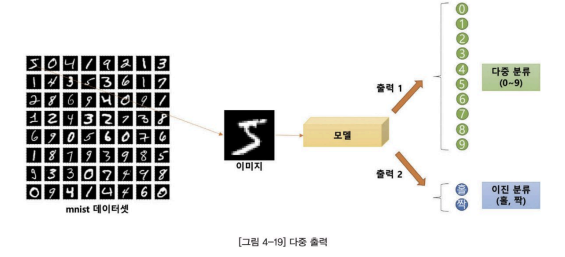

즉, 다음 모델은 입력 이미지를 하나 받아서 해당 손글씨가 어떤 숫자인지를 분류하고 홀수인지 여부도 함께 분류하는 문제가 됨

In [36]:
# Functional API를 사용해 모델 생성

inputs=tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv=tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_layer')(inputs)
pool=tf.keras.layers.MaxPooling2D((2,2), name='maxpool_layer')(conv)
flat=tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs=tf.keras.layers.Flatten()(inputs)
concat=tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs=tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs=tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model=tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_layer (Conv2D)       (None, 26, 26, 32)           320       ['inputs[0][0]']              
                                                                                                  
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d_layer[0][0]']        
 D)                                                                                               
                                                                                                  
 flatten_layer (Flatten)     (None, 5408)                 0         ['maxpool_layer[0][0]'] 

In [37]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


-> 출력은 10개인 텐서와 1개인 텐서로 두 개가 확인됨

In [ ]:
# 모델 구조 시각화
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

In [38]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss={'digit_dense': 'sparse_categorical_crossentropy', 'odd_dense':'binary_crossentropy'},
              loss_weights={'digit_dense':1, 'odd_dense':0.5}, # loss = 1.0 * sparse_categorical_crossentropy + 0.5 * binary_crossentropy
              metrics=['accuracy'])

# 모델 훈련
history=model.fit({'inputs':x_train_in},
                  {'digit_dense':y_train, 'odd_dense':y_train_odd},
                   validation_data=({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd}), epochs=10)

# 모델 성능
model.evaluate({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd})

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.3731 - digit_dense_loss: 0.2111 - odd_dense_loss: 0.3242 - digit_dense_accuracy: 0.9396 - odd_dense_accuracy: 0.8649 - val_loss: 0.2352 - val_digit_dense_loss: 0.0969 - val_odd_dense_loss: 0.2767 - val_digit_dense_accuracy: 0.9704 - val_odd_dense_accuracy: 0.8907
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2175 - digit_dense_loss: 0.0814 - odd_dense_loss: 0.2722 - digit_dense_accuracy: 0.9764 - odd_dense_accuracy: 0.8910 - val_loss: 0.1990 - val_digit_dense_loss: 0.0677 - val_odd_dense_loss: 0.2626 - val_digit_dense_accuracy: 0.9781 - val_odd_dense_accuracy: 0.8954
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1940 - digit_dense_loss: 0.0624 - odd_dense_loss: 0.2632 - digit_dense_accuracy: 0.9815 - odd_dense_accuracy: 0.8955 - val_loss: 0.1893 - val_digit_dense_loss: 0.0589 - val_odd_dense_loss: 0.2609 - val_digit_dense_accuracy: 0.9803 -

[0.18686577677726746,
 0.05851743742823601,
 0.2566968500614166,
 0.9836999773979187,
 0.9010999798774719]

-> 숫자를 맞추는 문제는 98%의 정확도를 보인 반면, 홀수 여부를 판단하는 문제는 약 90%의 정확도를 보임

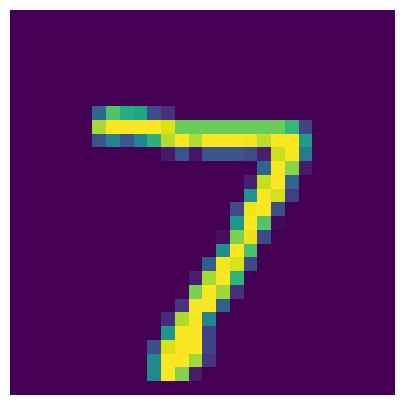

In [39]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx])
  plt.axis('off')
  plt.show()

plot_image(x_valid, 0)

In [40]:
digit_preds, odd_preds=model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 2s 5ms/step
[2.19184393e-12 2.51139276e-10 1.05617481e-09 5.71715702e-07
 3.41788715e-11 1.08638532e-12 1.14843236e-20 9.99999344e-01
 5.75410075e-09 5.57605517e-09]
[0.9996223]


In [41]:
# 예측 확률을 실제 정답 레이블로 변환
digit_labels=np.argmax(digit_preds, axis=1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

-> 검증 데이터셋의 첫 10개의 이미지에 대한 예측 레이블은 다음과 같고 첫 번째 이미지를 7로 예측하고 있음

In [42]:
# 홀수, 짝수 여부에 대한 예측 레이블 출력
odd_labels=(odd_preds>0.5).astype(np.int).reshape(1, -1)[0]
odd_labels[0:10]

<ipython-input-42-97a72952c97f>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  odd_labels=(odd_preds>0.5).astype(np.int).reshape(1, -1)[0]


array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

###4. 전이 학습(Transfer Learning)

전이 학습 : 앞서 훈련한 모델의 일부를 가져와서 그대로 사용하고, 최종 출력층만 새롭게 추가하여 모델을 재구성할 수 있음. 이처럼 기존에 학습된 모델을 활용해 새로운 모델을 만들어내는 개념

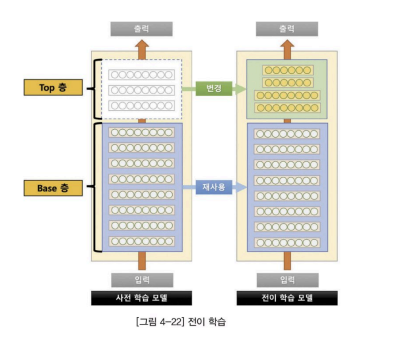

In [43]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output=model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model=tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


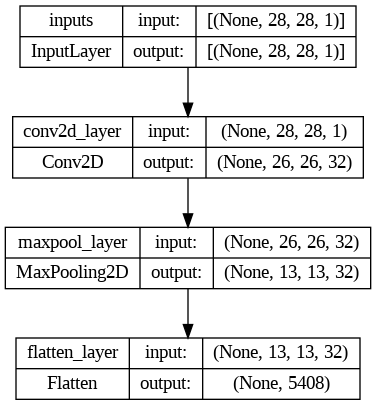

In [44]:
# 모델 구조 시각화
tf.keras.utils.plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [45]:
# Sequential API 적용
digit_model=tf.keras.Sequential([
    base_model, tf.keras.layers.Dense(10, activation='softmax')
])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


-> 훈련이 가능하다는 뜻 : 모델 훈련 시 파라미터 값이 업데이트됨

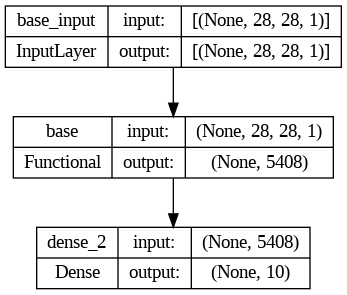

In [46]:
# 모델 구조 시각화
tf.keras.utils.plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

-> 최종적으로 노드 10개를 가진 분류기 역할을 하는 Dense 레이어가 추가됨

In [47]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=digit_model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1312 - accuracy: 0.9625 - val_loss: 0.0701 - val_accuracy: 0.9782
Epoch 2/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0590 - accuracy: 0.9831 - val_loss: 0.0507 - val_accuracy: 0.9834
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0461 - accuracy: 0.9857 - val_loss: 0.0560 - val_accuracy: 0.9817
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0362 - accuracy: 0.9886 - val_loss: 0.0548 - val_accuracy: 0.9828
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0299 - accuracy: 0.9907 - val_loss: 0.0492 - val_accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0256 - accuracy: 0.9923 - val_loss: 0.0635 - val_accuracy: 0.9820
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0213 - accuracy: 0.9934 - val_loss: 0.0499 -

-> 약 98.3%의 정확도

In [48]:
# 베이스 모델의 가중치 고정 (Freeze Model)

base_model_frozen=tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable=False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


-> 훈련 가능한 파라미터 개수가 0

In [49]:
# Functional API 적용
dense_output=tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen=tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

-> 앞서 고정한 320개의 파라미터는 훈련이 불가능함. 훈련 가능한 파라미터는 Flatten 레이어의 출력 5408개와 Dense 레이어의 10개 노드 사이의 가중치만 해당됨

In [52]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정 (Freeze Layer)

base_model_frozen2=tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable=False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


In [53]:
# Functional API 적용
dense_output2=tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2=tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [54]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=digit_model_frozen2.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1166 - accuracy: 0.9685 - val_loss: 0.0564 - val_accuracy: 0.9829
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0496 - accuracy: 0.9856 - val_loss: 0.0480 - val_accuracy: 0.9851
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0362 - accuracy: 0.9892 - val_loss: 0.0532 - val_accuracy: 0.9817
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0287 - accuracy: 0.9913 - val_loss: 0.0471 - val_accuracy: 0.9849
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0225 - accuracy: 0.9931 - val_loss: 0.0545 - val_accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0182 - accuracy: 0.9947 - val_loss: 0.0573 - val_accuracy: 0.9827
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0161 - accuracy: 0.9953 - val_loss: 0.0514 - val_ac